#### Julia introduction 

##### Naming conventions:
- Generally, variable names are written in lowercase.
- Underscores are used to separate different words in a variable name, but it is not advisable to use names that would require underscores.
- Function and macros names are in lowercase. Underscores are not used.
- The first character of types and modules is uppercase. The separation between words in names is done using upper camel case.
- The functions that modify or write to any of their arguments end with "!" symbol

We mentioned earlier that Julia is a strongly-typed language. Therefore, it is necessary for a variable’s type to be defined. If it is not defined explicitly, then Julia will try to infer it from the value assigned to the variable.
We can use the `typeof()` function provided by Julia to find the type of the variable.

A simple trick that helps to close the julia REPL is pressing CTRL+D.

##### Integers, bits, bytes and bools

Integers, bits, bytes, bools, and floating point numbers are used in arithmetic operations.
Built-in representations of them are called as numeric primitives, and numeric literals are their representations as values in code. Let’s understand Julia’s primitive numeric types. The following is a table of Integer types,
which includes bits, bytes, and bool:

|Type |Number of bits |Smallest value |Largest value|
|-----|---------------|---------------|-------------|
|Int8 |8              |$-2^7$         |$2^7 - 1$    |
|UInt8|8              |$0$            |$2^8 - 1$    |
|Int16|16             |$-2^{15}$      |$2^{15} - 1$ |
|UInt16|16            |$0$            |$2^{16} - 1$ |
|Int32|32             |$-2^{31}$      |$2^{31} - 1$ |
|UInt32|32            |$0$            |$2^{32} - 1$ |
|Int64|64             |$-2^{63}$      |$2^{63} - 1$ |
|UInt64|64            |$0$            |$2^{64} - 1$ |
|Int128 |128          |$-2^{127}$     |$2^{127} - 1$|
|UInt128 |128         |$0$            |$2^{128} - 1$|
|Bool |8              |false(0)       |true(1)      |


The UInt type refers to unsigned integers. These are those integers whose values start from
0.
Unlike other languages, 0, NULL, or empty strings are not treated as false in Julia.


##### Performing bitwise operations

|Expression |Name|
|-----------|----|
|~x         |bitwise not|
|x & y      |bitwise and|
|x \\| y        |bitwise or|
|x ⊻ y        |bitwise xor|
|x $\ggg$ y       |logical shift right|
|x $\gg$ y       |arithmetic shift right|
|x $\ll$ y       |arithmetic shift left|

#### Some theory about binary encoding

Every information in a computer is stored into sequences of ones and zeros. One such piece of data - a zero or a one - is called a bit. Eight bits make a bite. Bytes are relevant units because - generallly speaking - they are the smallest addressable units of memory.

Suppose you have 40 bits of data, so 5 bytes:

`01001000` `01100101` `01101100` `01101100` `01101111`

You can request to read or write data in one of those bytes by specifying an offset from the starting point. 
You always read or write one whole byte at a time, not individual bits. Therefore most information — barring compression mechanisms — is encoded in bytes as basic units, not bits.

##### Why is a byte 8 bits, and not 10?

We knwo that in decimal numerical system, multiplying or dividing bu powers of ten is trivial. It is just appending zeros or shifting the decimal point.

` 3.1415 X 100 = 314.5 `

Computers instead are based on the algebra of powers of two. In an equivalent way of the decimal system, multiplying by a power of two is translated into shifting digits in the binary representation of a number.

`13 X 8 = 104 ` corresponds to `0001101 X 1000 = 1101000`

##### How many bytes to a kilobyte?

Good question. There was no official standardization regarding kilobytes, megabytes, gigabytes, etc. until 1998. Nevertheless, these units were widely used among tech people and consumers alike. You bought a hard drive, the size of it was given in gigabytes.

People in tech were counting 2¹⁰ = 1024 bytes per kilobyte, 1024 kilobytes per megabyte, 1024 megabytes per gigabyte and so on. As we learned, powers of 2 is the practical thing to use when you’re working with computer memory.

Famously, marketing people selling hard drives had the ingenious idea that lacking an official standardization, they could just claim that ‘their’ units are based on 1000, and therefore ‘their’ gigabyte is 1000³ = 1,000,000,000 bytes — instead of 1024³ = 1,073,741,824, so they could shortchange you on space. The bigger the drive, the more of a difference.

##### Anatomy of a byte 

If we were asked to interpret a sequence of eight bits how would we do that? For example `01101101`. It's not so easy to remember it and repeat in memory. When communicating binary data to humans, ones and zeros are terribly inefficient. Let’s divide a byte value into two groups of 4 bits each— these groups are called nibbles — and assign a symbol to all bit patterns a nibble can take.

|bits | Hex|
|-----|----|
|0000 | 0 |
|0001 | 1 |
|0010 | 2 |
|0011 | 3 |
|0100 | 4 |
|0101 | 5 |
|0110 | 6 |
|0111 | 7 |
|1000 | 8 |
|1001 | 9 |
|1010 | A |
|1011 | B |
|1100 | C |
|1101 | D |
|1110 | E |
|1111 | F |

We see that hexadecimal numerical system means only that there are sixteen possible values to encode a nibble (why? since $1(2^3) + 1(2^2) + 1(2^1) + 1(2^0) = 16 - 1$ and therefore it is possible to achieve from zero to fifteen in binary notation with four digits that are sixteen different numbers). In our case the sequence of 8 bits becomes 0x6D (in hexadecimal encoding). If you were to interpret 0x6D as an ASCII character, it would be m. If you were to interpret it as a two’s complement number, it would be 109. If you were to interpret it as a fixed point number with 3 fractional digits, it would be 13.625.

When given a piece of binary data, you generally have to be given the context to make any sense of it. For text files, it’s the encoding, which these days is mostly UTF-8 — an ASCII-compatible encoding for text characters. For other types of files, say a PNG file, you have to look up the meaning of the data in a corresponding file format specification.

##### Integer representation

The first and default interpretation of a byte — or a sequence of bytes — is as a positive integer. When interpreting byte values, the documentation will often imply that you know how to read bytes as integers.

***
From the PNG file format spec:
    
"The first eight bytes of a PNG datastream always contain the following (decimal) values:

137 80 78 71 13 10 26 10"
***

Now you see how `01101101`, `0x6D`, and `109` are all different notations for the same integer. And now it should make sense how looking at an ASCII table like this, they are indexed using various formats. It’s just a courtesy so you can look up the character using an index in whatever system you happen to have at hand.

##### Binary Text

Open a text edit editor, create a new file, put “Hello World” in it and save it as a simple text file.

Now get a hex editor. A hex editor is just a file editor that does not interpret the contents of a file for you —it just shows you the raw binary content. Any basic, free hex editor is fine. You can use an online hex editor as well.

A hex editor typically shows you three columns: the offset from the beginning of the file (usually in hex), the binary contents of the file (also in hex), and a third column shows the file’s bytes interpreted as ASCII characters.

If your file contents have some additional bytes at the beginning, it’s likely that your text editor saved a BOM in your file. Don’t worry about it.

##### Proper integers

So far we’ve talked about positive integers only, limiting ourselves to one byte at a time. But

“How about encoding integers bigger than 255? There is not enough bits in a byte to store higher values. And what about negative numbers?“

We use consecutive bytes of a fixed length — 2 bytes, 4 bytes, and 8 bytes are customary — and that extends the powers of 2 you have available. We use two’s complement encoding for signed integers.

What does it mean to have a signed integer through the two complement notation? The defining property of being a complement to a number with respect to $2^N$ is simply that the summation of this number with the original produce$2^N$ (where N is the number of bits taken into account for the numbers representation). In the case of three bits, where this correspondence is employed for representing negative numbers, it effectively means, using an analogy with decimal digits and a number-space only allowing eight non-negative numbers 0 through 7, dividing the number-space in two sets: the first four of the numbers 0 1 2 3 remain the same, while the remaining four encode negative numbers, maintaining their growing order, so making 4 encode -4, 5 encode -3, 6 encode -2 and 7 encode -1. A binary representation has an additional utility however, because the most significant bit also indicates the group (and the sign): it is 0 for the first group of non-negatives, and 1 for the second group of negatives. 

|Bits |Unsigned value |Signed value (two's complement)|
|-----|---------------|-------------------------------|
|000  |0              |0                              |
|001  |1              |1                              |
|010  |2              |2                              |
|011  |3              |3                              |
|100  |4              |-1                             |
|101  |5              |-2                             |
|110  |6              |-3                             |
|111  |7              |-4                             |

Calculation of the binary two's complement of a positive number essentially means subtracting the number from the $2^N$.
But as can be seen with the three-bit and four-bit $1000_2(2^3)$, the number $2^N$ will not itself be representable in a system limited to N bits as it is just outside the N bits space (the number is nevertheless the reference point of the "Two's complement" in an N-bit system). For example $2^3 = 8$ would be in binary $1(2^3) + 0(2^2) + 0(2^1) + 0(2^0) = 1000_2$ that contains a bit more than the three used for the representation. Because of this, when implemening the two's complement algorithm, we cannot write directly $8_{10} = 1000_2$ but we have to split the subtraction into two operations: first subtract from the maximum number in the N-bit system, that is 2N-1 (this term in binary is actually a simple number consisting of 'all 1s', and a subtraction from it can be done simply by inverting all bits in the number also known as the bitwise NOT operation) and then adding the one. The main question now is why subtracting the original number from $2^N$ gives as a result the same number but negative. 
Given a set of all possible N-bit values, we can assign the lower (by the binary value) half to be the integers from 0 to ($2^{N − 1} − 1$) inclusive and the upper half to be $−2^{N − 1}$ to −1 inclusive. The upper half (again, by the binary value) can be used to represent negative integers from $−2^{N − 1}$ to −1 because, under addition modulo $2^N$ they behave the same way as those negative integers. That is to say that because $i + j  \ \text{mod} \ 2^N = i + (j + 2^N) \ \text{mod} \ 2^N$ any value in the set { $j + k 2^N$ | k is an integer }  can be used in place of j.

For example, with eight bits, the unsigned bytes are 0 to 255. Subtracting 256 from the top half (128 to 255) yields the signed bytes −128 to −1.

The relationship to two's complement is realised by noting that 256 = 255 + 1, and (255 − x) is the ones' complement of x.

##### Fractional Numbers

So far we’ve been talking about whole numbers only. What about:

$\pi = 3.1415926535…$

There’s a standardized, hardware supported representation of floating point fractional numbers. The most commonly used versions are 4-bytes single precision, often called ‘float’, and the 8-bytes version which is commonly called ‘double’.

![Image of float standard representation](https://miro.medium.com/max/850/1*FWjEDq58FGrlmQqrUa67Pg.png)

The general idea is as follows:

The sign is stored in the leftmost bit. 0 stands for positive, 1 indicates a negative number. Our example number is positive.

Shaded red, a fractional number is given as 1 plus a sum of selected negative powers of 2 — so halves, quarters, eights, etc.… In the example above we have a bit set only in the quarters position. So the fractional number is 1.25

Note that the fractional number will always be between 1.0 inclusive and 2.0 exclusive.

In the next step you calculate an exponent given by the bits shaded green. Our exponent is 124. The standard dictates that we multiply our fractional number by 2^(exp-127), so in our case we multiply by 2^-3 = 1/8.

Finally he number encoded by our bit pattern is:

`1.25 × 1/8 = 0,15625`

You might be wondering how to effectively convert decimal numbers to floating point numbers with this encoding. In practice, you never have to do it manually, and the ecosystem — like your programming language standard library — takes care of it for you.

Oh, and regarding $\pi$, try interpreting this pattern:

`0 10000000 10010010000111111011011`

##### What's the idea behind the binary representation?

If we have a number expressed in the ordinary scale, we may express it to base b as follows. Letting N be the number, we have to determine the integers $a_n,a_{n−1},\dots,a_0$ in the expression:

$$
N = a_n b^n + a_{n-1}b^{n-1} + \dots + a_2b^2 + a_1b + a_0
$$

where $0 \leq a_i \leq b$. Dividing the above equation by $b$ we have:

$$
\frac{N}{b} = a_nb^{n-1} + a_{n-1}b^{n-2} + \dots + a_2b + a_1 + \frac{a_0}{b} = N' + \frac{a_0}{b} \\
N = N'b + a_0
$$

That is, the remainder $a_0$ of this division is the last digit in the desired representation. Indeed if we take into account the second line we see that the remainder of the division is $a_0$ and at the same time the coefficient of the first power of b is N' while the coefficient of the zeroth power of b is exactly $a_0$. Proceeding in this way, we obtain all the digits $a_0,a_1,\dots,a_n$.

##### Type of variables:
- arrays 

Arrays are the equivalent of lists and numpy arrays in python. It means that Julia arrays have the property of including into them different types of variables at the same time but they could also be fast in mathematical computations when made of single numerical type variables. Indexing starts from one instead of python and C where arrays start from zero.

There are three different arrays: instantiate an array with the functions 
- Vector()
- Array()
- Matrix()
- By specifying the components with [] with commas "," for vectors and semicolumns ";" for matrices (there is no Array way of creating an array from components)

If possible Julia tries to use `promote()` to promote the values of the same type. If not possible the array will be of the type any.

Array in Julia can be constructed in various ways, other than direct initialization of arrays from given values.

For example, for performance reasons, it is wise to initialize arrays of a given type (and size), without specifying any values. That is, not even initializing a new array with zeros.

To do this, we can employ keywords such as `Vector{T}`, `Matrix{T}` or `Array{T}`, where T is a type (see, for example, Numeric Types in the documentation). Among numeric types, arguably `Float64` (double-precision real), `ComplexF64` (double-precision complex), and `Int64` are among the most frequently used in numerical computing.

The reason to declare undefined arrays is to be able to fill them later – for example, with the use of a for loop (similarly to what list comprehension are in languages like python)

What happens under the hood when we declare an `undef` array, is that a certain portion of memory gets reserved (or allocated) for this specific use. As the computer is not even filling that chunk of memory with zeros, but it has only allocated that for a future use, we are saving some time.

In [1]:
n = 5
A1 = Array{Float64}(undef,n,n)          # 5×5 Matrix{Float64}
A2 = Matrix{Float64}(undef,n,n)         # 5×5 Matrix{Float64}

V1 = Array{Float64}(undef,n)            # 5-element Vector{Float64}
V2 = Vector{Float64}(undef,n)           # 5-element Vector{Float64}

# we can see that for numerical vectors 
# or for non numerical types we use Arrays of type "String" or "any"

A3 = Array{String}(undef,n)
A4 = Array{Any}(undef,n)

A1

5×5 Matrix{Float64}:
 1.00968e-315  1.02043e-315  1.00974e-315  1.02043e-315  1.02043e-315
 1.00968e-315  1.0136e-315   1.00973e-315  1.02043e-315  1.00974e-315
 1.01699e-315  1.0136e-315   1.00972e-315  1.02043e-315  1.02043e-315
 1.42686e-315  1.01357e-315  1.00972e-315  1.02043e-315  1.02043e-315
 1.02043e-315  1.01357e-315  1.02043e-315  1.02043e-315  1.00969e-315

##### Empty arrays

Empty arrays can be a useful starting point when we are in a situation where it is hard or impossible to know which array sizes we need in advance. An empty array can be later grown dynamically, and filled with values. To initialize an empty array, it is perfectly valid to use n = 0 in the above expressions.

In [30]:
v = Array{Float64}(undef,0)

# or as a shorthand for that command we can write 

v = Float64[]

# A possible source of errors would be to confuse 
# this array with an empty array of “Any” type, which is initialized as follows:

v = []    # Same as Any[], and you can't change this type easily later 

# If we later fill this array dynamically with Float values, its type would 
# remain fixed at “Any”, which could lead to bad performance – or even errors, 
# if we plan on passing this array to a function which requires arrays of type Float, for example.


Any[]

In [22]:
# let's create a one dimensional array with all components of the same type 
a1 = [1,2,3,4]
# it happens to be an array of integers

4-element Vector{Int64}:
 1
 2
 3
 4

In [20]:
a2 = [1,2,3,10.4]
# on the other hand if we use just a single float the array elements will be casted into the more complex type, float64  

4-element Vector{Float64}:
  1.0
  2.0
  3.0
 10.4

In [22]:
a3 = [1,2.0,"Julia"]

3-element Vector{Any}:
 1
 2.0
  "Julia"

There is also the possibility to create manually an array of all integers or floats with the "Int64" or "Float64" flag.

In [30]:
a4 = Int64[1,2,3,4]

4-element Vector{Int64}:
 1
 2
 3
 4

In order to differentiate a vector from a matrix we use also a different syntax. Indeed matrices will be instantiated without commas and for adding a dimension a semicolumn is needed.

In [28]:
a5 = [1 1 1; 2 3 4]
# it means that instead if we want to create a row vector we can write 
a6 = [1 2 3 4]
# it is actually different from a4 since the former was a 1-D vector while the latter is intrinsically a 2-D one

1×4 Matrix{Int64}:
 1  2  3  4

In [36]:
# in order to create a random matrix of n elements we can use the rand function 
a7 = rand(3,3)

3×3 Matrix{Float64}:
 0.988393  0.874103  0.0386055
 0.429981  0.473829  0.838718
 0.581066  0.952782  0.156304

In [57]:
zeros(2) # is the  way we can create a zeros vector of size n 

2-element Vector{Float64}:
 0.0
 0.0

Another way of creating a vector is by specifying a range with a certain step size 

In [24]:
a7 = collect(0:2:10)
# arguments are in order starting point:step:ending point
a8 = collect(10:-2:0)
# by using a negative step and inverted starting and ending point we create a reversed array

print(a7, "\n",a8)

[0, 2, 4, 6, 8, 10]
[10, 8, 6, 4, 2, 0]

For accessing an array we can 
- Use integers as indices like [1]; 
- We could also use multiple indices like another vector [1,2,3,4]; 
- We may also consider a range 1:4;
- there are some specific words like "end" that work as indices

Be careful that an array (a matrix, an array or a vector) is saved in memory as a flattened list meaning that, even with a multiple dimension array, we can access all elements just with a single integer values that ranges from one to the total number of components of the vector.

In [137]:
# example of flattened arrays that can be accessed with a single integer index. Indeed here we have a two dimensional 
# array and the second row, third column component can be selected with the index 6 instead of [2,3]
print(a5,"\n",a5[6], "\n", a5[2,3])

[1 1 1; 2 3 4]
4
4

In [52]:
a8[1:3], a8[[1,4,5]], a8[end]

([10, 8, 6], [10, 4, 2], 0)

Functions like push! and append! are useful to add a single component or an array of components to an existing vector

In [56]:
push!(a8,1), append!(a8,[1,2]) 
# since we have already added a component into a8, the append! function will recollect the pre existing changed vector 
# and add a new sequence of elements to that

([10, 8, 6, 4, 2, 0, 1, 1, 1, 2], [10, 8, 6, 4, 2, 0, 1, 1, 1, 2])

A weird thing different from python are the data types in arrays like "nothing" and "missing"

In [108]:
print(Array{Union{Nothing, Int}}(nothing, 2,2,2),"\n", Array{Union{Missing, Int}}(missing, 2,2,2))

[nothing nothing; nothing nothing;;; nothing nothing; nothing nothing]
[missing missing; missing missing;;; missing missing; missing missing]

In the case of the identity matrix, placing an integer right before a letter ‘I’ will do the job, but this requires the LinearAlgebra package:

In [48]:
using LinearAlgebra
# LinearAlgebra is useful toi introduce the notation for the identity matrix I 
M = 5I + [1 2; 3 4]

# indexing ranges first in rows and then columns, for example M[2] = 3 and M[3] = 2

2×2 Matrix{Int64}:
 6  2
 3  9

In [53]:
typeof([1 2 3]), typeof([1,2,3])

(Matrix{Int64}, Vector{Int64})

Arrays in Julia are, by default, Dynamic (i.e. growable, resizable) unless defined otherwise. We could change this default behavior by resorting to the StaticArrays.jl package, which can enhance performance for certain type of operations.
One-dimensional Arrays can be resized with functions such as push! and pop!. In our example below we are using numerical arrays, but these functions can be also applied to non-numerical arrays.

In [57]:
A = Float64[]       # Equivalent to A=Array{Float64}(undef,0)
push!(A, 4)         # Adds the number 4 at the end of the array
push!(A, 3)         # Adds the number 3 at the end of the array
v = pop!(A)         # Returns 3 and removes it from A (that is its last component) 
A

1-element Vector{Float64}:
 4.0

There are also functions such as `pushfirst!`, and `popfirst!` which work on the beginning of the array as opposed to the end. Additionally, the function `splice!(A,i)` and `deleteat!(A,i)` will incorporates (resp. delete) an element at a given position i.

##### Multi-dimensional array concatenation

For example, we can resort to `hcat`, `vcat`, and `cat` functions, to concatenate in the horizontal, vertical, or along any given dimension.

In [100]:
A = [4 5 6] 
B = [6 7 8] 

M1 = vcat(A, B)
M2 = hcat(A, B)

# The cat function, in turn, can be used to acomplish the same results as above.
# Importantly, cat will also work for n-dimensional arrays, as we can concatenate along any dimension. For example.

M3 = cat(A, B, dims=1)
M4 = cat(A, B, dims=2)
M5 = cat(A, B, dims=3)

# For 2D matrices, we can also resort to the same syntax that we used to input a matrix, using brackets and spaces 
# and semicolons as alternatives to hcat and vcat, respectively.

M6 = [A; B]
M7 = [A B]

M = [M1,M2,M3,M4,M5,M6,M7]

for i in 1:7
    print(M[i],"\n")
end

[4 5 6; 6 7 8]
[4 5 6 6 7 8]
[4 5 6; 6 7 8]
[4 5 6 6 7 8]
[4 5 6;;; 6 7 8]
[4 5 6; 6 7 8]
[4 5 6 6 7 8]


In [116]:
# Eventually be aware of the difference between vector, column vector with hvcat, row vector without commas and a matrix

println("Vector: ", [1, 2, 3, 4]) # it is of type vector
println("Column vector: ", hvcat(1, 1, 2, 3, 4)) # it's a matrix 
println("Row vector: ", [1 2 3 4]) # it's still a matrix
println("Matrix: ", [1 2 3; 4 5 6])

Vector: [1, 2, 3, 4]
Column vector: [1; 2; 3; 4;;]
Row vector: [1 2 3 4]
Matrix: [1 2 3; 4 5 6]


- tuples

Tuples are collections of values of possibly different data types, which can't be modified when initialized. Tuples are mostly good for small fixed-length collections, and are closely related to function arguments.

1. The main difference between tuples and array is the syntax way they are initialized and their functionality:
Indeed when we create a tuple it appears to be a row vector of elements limited by a parenthesis ();

2. Another difference is that tuples are immutable while arrays and matrices are mutable. The reason why tuples are immutable is that they are indended to be objects that should not vary with time like "names" or "addresses" and so on;

3. Apart from differences methods are similar to arrays' and we can also have 2-D tuples 



In [113]:
a9 = (1,2,3,4)
# just a one dimensional tuple 

(1, 2, 3, 4)

Indexing: if we select [1] as an element in a tuple we do not end up with a single component but, as with numpy arrays, we are given the first row of the tuple. In order to access a single component we should call [1][2] for selecting from the first "row" the second element.

In [142]:
a10 = ((1,2),(3,4))
# the way of accessing an element is a bit different from arrays. While with arrays we could just use another array for 
# selecting elements 
print(a10[1], "\n", a10[1][2])

(1, 2)
2

We can easily convert a tuple into an array in various ways like by usign the `collect` function, array comprehension or the `splat` notation (it's like the unpack operator `*` in python)

In [69]:
a = (1, 2, 3)

t1 = collect(a)
t2 = [x for x in a]
t3 = [a...]

3-element Vector{Int64}:
 1
 2
 3

There exist also named tuples:

In [148]:
marks = (science = (90,100), maths = (95,100), english = (80,100)) 
marks1 = (history = (80,100), sports = (60,100))

marks.science

(90, 100)

In [149]:
merge(marks, marks1)
# we can also merge two named tuples

(science = (90, 100), maths = (95, 100), english = (80, 100), history = (80, 100), sports = (60, 100))

In [70]:
p = (x = 1.2, y = 2.3)

(x = 1.2, y = 2.3)

The elements of p can be accessed via p.x and p.y as well as p[1] and p[2].

p is of type `NamedTuple{(:x, :y), Tuple{Float64, Float64}}`.

We can also retrieve the names of the keys and the values of a named tuple, using the `keys` and `values` functions, as follows:

In [72]:
K = keys(p)                
V = values(p) 
print(K,V)              

(:x, :y)(1.2, 2.3)

and we can merge this key/value pairs into a named tuple again with the `zip` function and the `splat` notation:

In [73]:
p_new = (; zip(K,V)...)

(x = 1.2, y = 2.3)

- dictionaries

A Dictionary in Julia is a collection of key-value pairs, which provide much more flexibility than arrays or named tuples. In particular, Dictionaries are mutable, and the keys can be of any type (where in Arrays they have to be Integers, and in Named Tuples, symbols (symbols are just types with ":" in front of them)).

In [74]:
D = Dict("a" => 1, "b" => 2, 1 => "a")
# alternatively we can initialize a dictionary using key/value pairs

D = Dict([("a", 1), ("b", 2), (1,"a")])

Dict{Any, Any} with 3 entries:
  "b" => 2
  "a" => 1
  1   => "a"

In [168]:
dict1 = Dict("car1" => 1000, "car2" => 20)
dict1["car1"]
# for accessing to a value it is necessary to use the correspondent key with

1000

In [164]:
# another way of creating a dictionary is using instead of strings, symbols
dict2 = Dict(:car1 => 10, :car2 => 20)
dict2[:car1]
# for accessing to a value it is necessary to use the correspondent key with ":"

10

Dictionaries are also iterable objects, so we can loop through the elements of a given dictionary:

In [76]:
for e in D
    println(e)
end

Pair{Any, Any}("b", 2)
Pair{Any, Any}("a", 1)
Pair{Any, Any}(1, "a")


as each element in a dictionary is a Pair, we can access individual components of e doing e[1] and e[2]. More conveniently, we can unstructure the pair into two variables, as follows:

In [77]:
for (k,v) in D
    println(k, " => ", v)
end

b => 2
a => 1
1 => a


For checking whether a key in the dictionary exists or not we can use the function haskey(dict1,"car3"):

In [169]:
haskey(dict1, "car3")
# since there is no key in the dictionary named car3  

false

For deleting an object inside the dictionary we can use delete! function where the exclamation mark means that we are applying the deleting function into a mutable object like the dictionary

In [170]:
delete!(dict1,"car1")

Dict{String, Int64} with 1 entry:
  "car2" => 20

In [173]:
keys(dict1)
# useful when we want to iterate into the keys of the dictionary and eventually adding some pairs
values(dict1)

ValueIterator for a Dict{String, Int64} with 1 entry. Values:
  20

In [174]:
merge(dict1,dict2)
# for merging two dictionaries even with different key type of variables 

Dict{Any, Int64} with 3 entries:
  :car1  => 10
  :car2  => 20
  "car2" => 20

One important characteristics of dictionaries is that they are mutable structures, so can be modified. For example, the following is possible:

In [78]:
D["c"] = 3           # Adding a new key
D["c"] = "Hello"     # Updating existing key
D = delete!(D, "c")  # Deleting an existing key

Dict{Any, Any} with 3 entries:
  "b" => 2
  "a" => 1
  1   => "a"

- sets

The main difference between sets and other kind of variables is that they do not have duplicated values. It's not an ordered collection inspite of dictionaries. 

In [175]:
sports_brands = Set(["Adidas", "Nike", "Puma", "Rebook"])

Set{String} with 4 elements:
  "Rebook"
  "Nike"
  "Puma"
  "Adidas"

Let's perform some standard operations

In [176]:
in("HRX", sports_brands) 
# checks whether a string is in the set or not 

false

In [177]:
in("Nike", sports_brands)

true

In [178]:
sports_brands_india = Set(["Adidas", "HRX", "Nike"])

Set{String} with 3 elements:
  "Nike"
  "HRX"
  "Adidas"

Let's see how we can apply some logical operations to sets

In [179]:
union(sports_brands, sports_brands_india)

Set{String} with 5 elements:
  "Rebook"
  "Nike"
  "Puma"
  "HRX"
  "Adidas"

In [180]:
intersect(sports_brands, sports_brands_india)

Set{String} with 2 elements:
  "Nike"
  "Adidas"

In [182]:
setdiff(sports_brands, sports_brands_india)
# it gives the list of items in the first list that are not present in the second 
# compatibly with what we said this operation is not commutable since changing the order of the arguments will change 
# the result too
setdiff(sports_brands_india, sports_brands)

Set{String} with 1 element:
  "HRX"

In [183]:
# if we want to add another element to the set we can just use push! function
push!(sports_brands, "HRX")

Set{String} with 5 elements:
  "Rebook"
  "Nike"
  "Puma"
  "HRX"
  "Adidas"

##### Date operation in Julia 

Most of the datasets we will see will have this information. In Julia there are mainly three data variables types like
- Dates.Time
- Dates.Date
- Dates.Datetime

In [186]:
using Dates

In [187]:
now()

2022-04-25T15:28:31.741

In [188]:
today()

2022-04-25

In [201]:
# let's define a date in the US format

birthdate = Date(2000,5,1) #YYYY,MM,DD

2000-05-01

In [191]:
# we may also use the function Datetime for specifying the time 
birthdate = DateTime(2000,5,1,10,15,25)

2000-05-01T10:15:25

Some useful functions could be year(), month(), day(), dayofweek(), hour(), dayname(), dayofquarter(), daysinmonth() and so on.

In [195]:
dayname(now())

"Monday"

In [202]:
today() - birthdate
# they must be homogeneus 

8029 days

In order to choose the day format we can specify manually like the following:


In [203]:
date_format = DateFormat("dd-mm-yyyy")

dateformat"dd-mm-yyyy"

In [204]:
Dates.format(today(), date_format) # that is the usual way we use to represent the date 

"25-04-2022"

##### Conditional statements

Conditional statements can be easily implemented by using logical operators. In particular we can use "?" to ask to do an operation after a condition is verified and ":" to list the complementary possibilies (like an "else" in python)

if condition True  <br> do something : do another thing

In [209]:
a = 10 
a > 10 ? "yes" : "no"

# TERNARY OPERATOR

"no"

In [210]:
b = 20 

20

In [213]:
a > 10 || b < 20 
# it is actually the logical or of the two conditions. Here both statements are false 

false

In [217]:
a >= 10 && b <= 20 
# it is the logical and operator and it needs both statements true to get a true result

true

In [218]:
if a > 10
    print("a is greater than 10")
elseif a < 10
    print("a is less than 10")
else 
    print("a is equal to 10")
end 

a is equal to 10

In [219]:
# another operation that can be done is comparing two strings with the == operator 

state = "united_states"

if state == "united_states"
    print("oh yea")
else 
    print("oh no")
end

oh yea

##### Loops

In [223]:
for i in sports_brands
    println(i)
end
# println is the print function with the newline incorporated and just as in python the variable i is dynamically typed 
# and this iterable can be iterated in all type of lists

Rebook
Nike
Puma
HRX
Adidas


In [227]:
for i in dict2
    print(typeof(i))
end
# each component of the dictionary on which the i variable is iterating is a pair{symbol, int64} 

Pair{Symbol, Int64}Pair{Symbol, Int64}

In [236]:
for i in collect(0:2:10)
    @show i
end
# the show macro shows actually what is happening through the loop 

i = 0
i = 2
i = 4
i = 6
i = 8
i = 10


In [252]:
for i in 0:1:10
    if i%2 == 0
        continue 
    end 
    println("$(i) is an odd number in the range 1:10")
end

1 is an odd number in the range 1:10
3 is an odd number in the range 1:10
5 is an odd number in the range 1:10
7 is an odd number in the range 1:10
9 is an odd number in the range 1:10


##### Smart loop or comprehensions in Julia

As we have already seen in pyhton, in Julia there exist "list" comprehensions. They have the exact same syntax as in python indeed:


In [254]:
x = [i for i in 1:10]

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [256]:
s = Set([i for i in 1:10])
# it is unordered w.r.t an array

Set{Int64} with 10 elements:
  5
  4
  6
  7
  2
  10
  9
  8
  3
  1

In [261]:
alphabet = Dict(string(Char(x + 64)) => x for x in 1:26)

Dict{String, Int64} with 26 entries:
  "Z" => 26
  "Q" => 17
  "W" => 23
  "T" => 20
  "C" => 3
  "P" => 16
  "V" => 22
  "L" => 12
  "O" => 15
  "B" => 2
  "M" => 13
  "N" => 14
  "H" => 8
  "A" => 1
  "X" => 24
  "D" => 4
  "G" => 7
  "E" => 5
  "Y" => 25
  ⋮   => ⋮

In [262]:
[(x,y) for x in 1:3, y in 1:2]

3×2 Matrix{Tuple{Int64, Int64}}:
 (1, 1)  (1, 2)
 (2, 1)  (2, 2)
 (3, 1)  (3, 2)

In [276]:
# now we are going to see the conditional comprehension
[x for x in 1:10 if x%2 == 0]

5-element Vector{Int64}:
  2
  4
  6
  8
 10

##### Working with strings

In [280]:
s2 = "i love julia"
s2[1]

'i': ASCII/Unicode U+0069 (category Ll: Letter, lowercase)

In [287]:
length(s2)

12

In [289]:
lastindex(s2)
# same result as length but faster with longer arrays 

12

In [290]:
isascii(s2)

true

In [292]:
"love" * "julia"
# for adding two strings or we could just write 
string("love","julia")

"lovejulia"

In [299]:
# the split function has an infinite way of dividing the components of the string w.r.t. some separators
print(split(s2, ""),"\n", split(s2, "i"), "\n", split(s2, "love"))

SubString{String}["i", " ", "l", "o", "v", "e", " ", "j", "u", "l", "i", "a"]
SubString{String}["", " love jul", "a"]
SubString{String}["i ", " julia"]

In [301]:
# there is a way for casting a number written as a character into an integer or float
parse(Int64, "100"), parse(Float64, "100.2")

(100, 100.2)

In [305]:
# we can also check if a character is into a string with the "in" function
in('i', s2)

true

be careful that ' ' constructs a character type while "" is a string. It means that when we want to check if a string
is contained into another we should use occursin function.

In [306]:
occursin("love", s2)

true

In [307]:
findfirst("l", s2) 
# it means that the first occurrence happens from the element 3 to 3

3:3

In [308]:
findfirst("love", s2)

3:6

##### Functions


In [309]:
f(x) = x + x
f(2)

4

In [312]:
# or we can expand the definition of the function in this way 
function g(x)
    return x + x
end

g(2)

4

In [326]:
function convert_meter_to_inch(val, name = "Patron")
    if name == "Patron"
        println("value for name is not supplied")
    else 
        println("hi...", name, " the conversion value is ")
    end 
        return val * 39.37
end

convert_meter_to_inch (generic function with 2 methods)

In [323]:
convert_meter_to_inch(2.3) # since the second argument has not changed 

value for name is not supplied


90.55099999999999

In [327]:
convert_meter_to_inch(2.3, "Pippo")

hi...Pippo the conversion value is 


90.55099999999999

##### Formatting number and strings 

In [328]:
using Printf

In [334]:
@printf("value is %i", 10)
@sprintf("value is %s", 'l') 
# sprintf gives a string while printf with a string gives just a print 

value is 10

"value is l"

In [335]:
@printf("value is %.3e", 103040405050)

value is 1.030e+11

##### Working with .csv files

In [349]:
using DataFrames
using CSV

To parse a CSV we just pass it to the CSV.File(path) command. Path argument contains the path to the file.
The result is a CSV.File object which can be iterated to get CSV.Rows. In the CSV.Row object you can access the values using the column names or indices.

In [354]:
iris_reader = CSV.File("iris.csv")

150-element CSV.File:
 CSV.Row: (Column1 = 1, Sepal.Length = 5.1, Sepal.Width = 3.5, Petal.Length = 1.4, Petal.Width = 0.2, Species = "setosa")
 CSV.Row: (Column1 = 2, Sepal.Length = 4.9, Sepal.Width = 3.0, Petal.Length = 1.4, Petal.Width = 0.2, Species = "setosa")
 CSV.Row: (Column1 = 3, Sepal.Length = 4.7, Sepal.Width = 3.2, Petal.Length = 1.3, Petal.Width = 0.2, Species = "setosa")
 CSV.Row: (Column1 = 4, Sepal.Length = 4.6, Sepal.Width = 3.1, Petal.Length = 1.5, Petal.Width = 0.2, Species = "setosa")
 CSV.Row: (Column1 = 5, Sepal.Length = 5.0, Sepal.Width = 3.6, Petal.Length = 1.4, Petal.Width = 0.2, Species = "setosa")
 CSV.Row: (Column1 = 6, Sepal.Length = 5.4, Sepal.Width = 3.9, Petal.Length = 1.7, Petal.Width = 0.4, Species = "setosa")
 CSV.Row: (Column1 = 7, Sepal.Length = 4.6, Sepal.Width = 3.4, Petal.Length = 1.4, Petal.Width = 0.3, Species = "setosa")
 CSV.Row: (Column1 = 8, Sepal.Length = 5.0, Sepal.Width = 3.4, Petal.Length = 1.5, Petal.Width = 0.2, Species = "setosa")
 C

In [372]:
for row in iris_reader
    println("values: $(row[1]), $(row[2]), $(row[3])")
end

values: 1, 5.1, 3.5
values: 2, 4.9, 3.0
values: 3, 4.7, 3.2
values: 4, 4.6, 3.1
values: 5, 5.0, 3.6
values: 6, 5.4, 3.9
values: 7, 4.6, 3.4
values: 8, 5.0, 3.4
values: 9, 4.4, 2.9
values: 10, 4.9, 3.1
values: 11, 5.4, 3.7
values: 12, 4.8, 3.4
values: 13, 4.8, 3.0
values: 14, 4.3, 3.0
values: 15, 5.8, 4.0
values: 16, 5.7, 4.4
values: 17, 5.4, 3.9
values: 18, 5.1, 3.5
values: 19, 5.7, 3.8
values: 20, 5.1, 3.8
values: 21, 5.4, 3.4
values: 22, 5.1, 3.7
values: 23, 4.6, 3.6
values: 24, 5.1, 3.3
values: 25, 4.8, 3.4
values: 26, 5.0, 3.0
values: 27, 5.0, 3.4
values: 28, 5.2, 3.5
values: 29, 5.2, 3.4
values: 30, 4.7, 3.2
values: 31, 4.8, 3.1
values: 32, 5.4, 3.4
values: 33, 5.2, 4.1
values: 34, 5.5, 4.2
values: 35, 4.9, 3.1
values: 36, 5.0, 3.2
values: 37, 5.5, 3.5
values: 38, 4.9, 3.6
values: 39, 4.4, 3.0
values: 40, 5.1, 3.4
values: 41, 5.0, 3.5
values: 42, 4.5, 2.3
values: 43, 4.4, 3.2
values: 44, 5.0, 3.5
values: 45, 5.1, 3.8
values: 46, 4.8, 3.0
values: 47, 5.1, 3.8
values: 48, 4.6, 3.2
v

CSV correctly guessed that our file contains a header on the first row and the “,” (comma) is used as a separator. That is because the header parameter has 1 as the default value. Julia starts indexing with 1 (unlike python’s 0). Delim parameter has comma as a default value, but it the CSV fails to parse it is using the first 10 rows to guess other suitable delimiters like a semicolon, tab, space, or pipe.
We can always specify these parameters manually. Julia convention says that keyword parameters are separated by a semicolon, but comma works as well.

In [ ]:
# to separate kwargs by semicolon is a Julia standard
CSV.File(path; header=1, delim=";")
# comma works as well
CSV.File(path, header=1, delim=",")

In order to turn the CSV.File to a DataFrame we have to pass it to the DataFrames.DataFrame object. There are at least 3 ways how to do that in Julia.

##### Option 1 — pass to the DataFrame
We can wrap DataFrame around the CSV.File(path; kwargs).

In [373]:
df = DataFrame(iris_reader)

,Column1,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,Int64,Float64,Float64,Float64,Float64,String15
1,1,5.1,3.5,1.4,0.2,setosa
2,2,4.9,3.0,1.4,0.2,setosa
3,3,4.7,3.2,1.3,0.2,setosa
4,4,4.6,3.1,1.5,0.2,setosa
5,5,5.0,3.6,1.4,0.2,setosa
6,6,5.4,3.9,1.7,0.4,setosa
7,7,4.6,3.4,1.4,0.3,setosa
8,8,5.0,3.4,1.5,0.2,setosa
9,9,4.4,2.9,1.4,0.2,setosa


##### Option 2 — pipe to the DataFrame
The second possibility is to use Julia’a pipe operator |> to pass the CSV.File to a DataFrame.

In [374]:
df = iris_reader |> DataFrame

,Column1,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,Int64,Float64,Float64,Float64,Float64,String15
1,1,5.1,3.5,1.4,0.2,setosa
2,2,4.9,3.0,1.4,0.2,setosa
3,3,4.7,3.2,1.3,0.2,setosa
4,4,4.6,3.1,1.5,0.2,setosa
5,5,5.0,3.6,1.4,0.2,setosa
6,6,5.4,3.9,1.7,0.4,setosa
7,7,4.6,3.4,1.4,0.3,setosa
8,8,5.0,3.4,1.5,0.2,setosa
9,9,4.4,2.9,1.4,0.2,setosa


##### Option 3 — CSV.read()
To make the code similar to other languages, Julia designers decided to add a bit of syntactic sugar and allow the third option. CSV.read() has the path argument to the file as the first parameter and DataFrame object as the second. Other parameters can follow.

In [376]:
df = CSV.read("iris.csv", DataFrame)

,Column1,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,Int64,Float64,Float64,Float64,Float64,String15
1,1,5.1,3.5,1.4,0.2,setosa
2,2,4.9,3.0,1.4,0.2,setosa
3,3,4.7,3.2,1.3,0.2,setosa
4,4,4.6,3.1,1.5,0.2,setosa
5,5,5.0,3.6,1.4,0.2,setosa
6,6,5.4,3.9,1.7,0.4,setosa
7,7,4.6,3.4,1.4,0.3,setosa
8,8,5.0,3.4,1.5,0.2,setosa
9,9,4.4,2.9,1.4,0.2,setosa


##### Visualization of data

In [79]:
using Plots

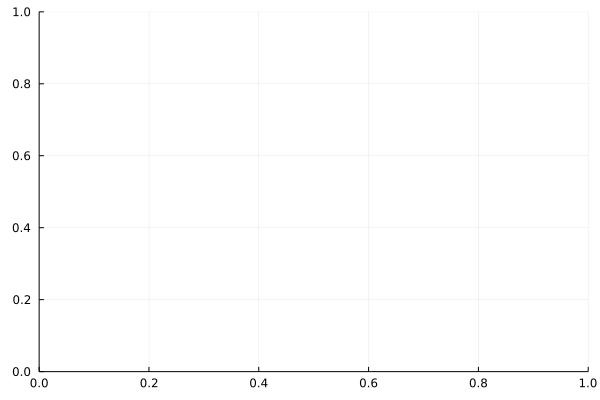

In [379]:
plot()
# it is the very basic start with the xy grid 

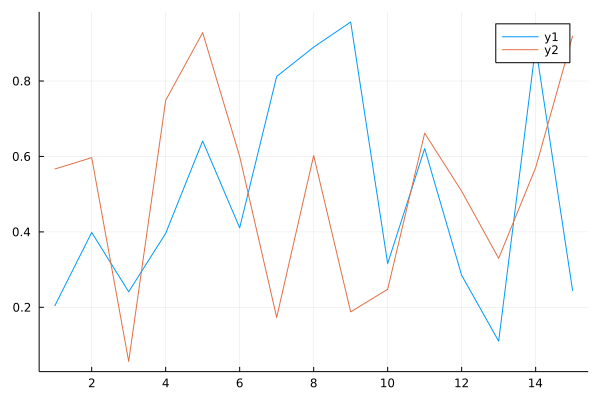

In [81]:
x = 1:15; y = rand(15); z = rand(15)
plot(x,y)
plot!(x,z)
# the ! operator says that we want to work on a mutable object and change its form and not remake it from scratch. 
# it means we are actually adding another line into the pre existing plot

Another way of creating a plot is using object oriented programming. Indeed we can instantiate an object and then add a line to it.

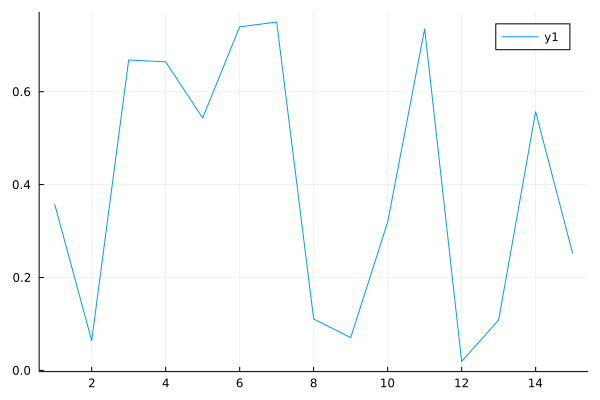

In [389]:
p = plot()
plot!(p,x,y)

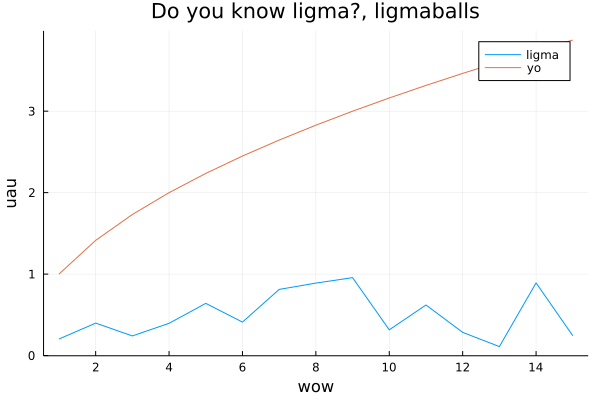

In [85]:
p = plot(x,y, title = "Do you know ligma?, ligmaballs", label = "ligma", xlabel = "wow", ylabel = "uau")
f = x.^(1/2)
plot!(p,x,f, label = "yo")

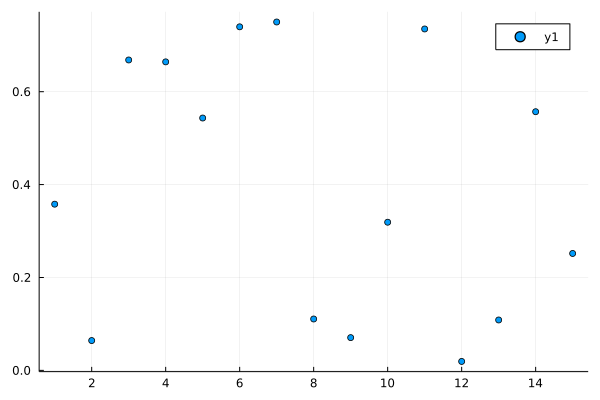

In [394]:
scatter(x,y)

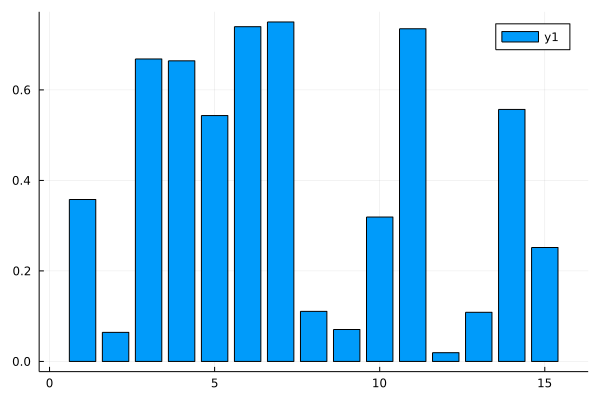

In [395]:
bar(x,y)

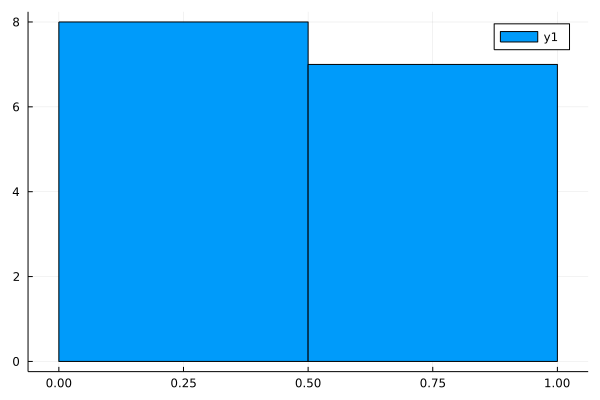

In [397]:
histogram(y)

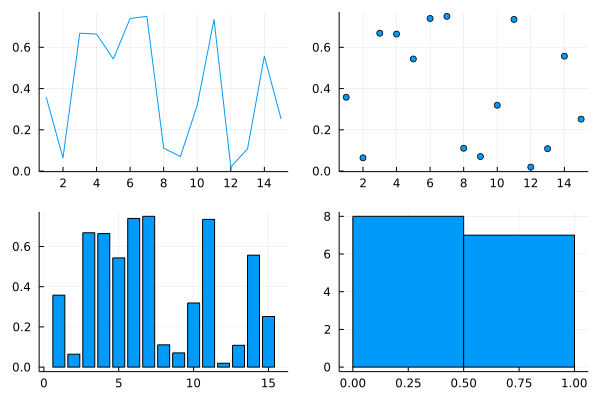

In [404]:
p1 = plot(x,y)
p2 = scatter(x,y)
p3 = bar(x,y)
p4 = histogram(y)
plot(p1,p2,p3,p4, layout = (2,2), legend = false)

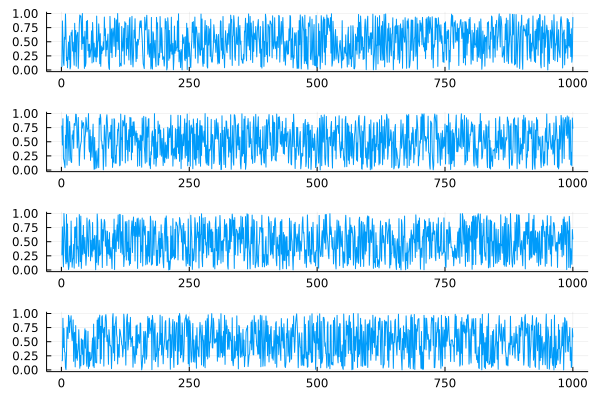

In [415]:
x = 1:1000
y = rand(1000,4)
plot(x,y,layout = (4,1), legend = false)

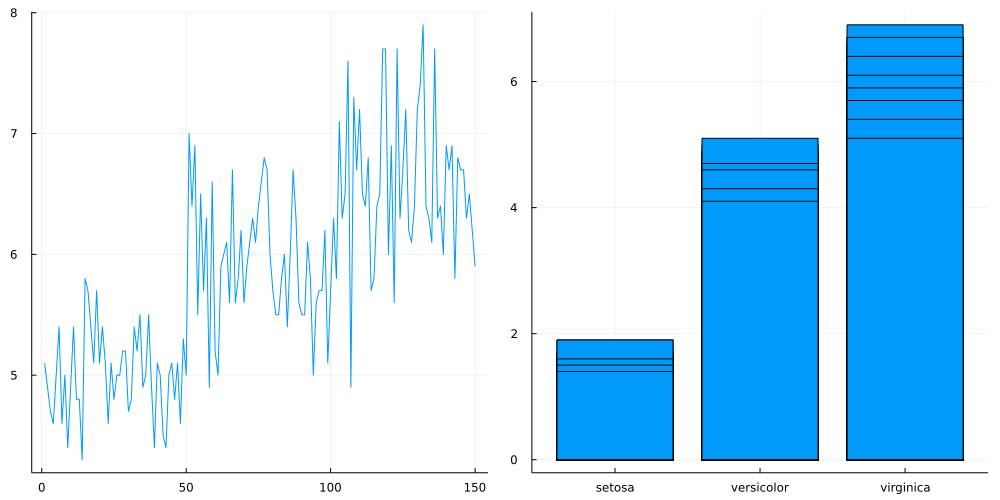

In [443]:
iris = CSV.read("iris.csv", DataFrame, normalizenames = true) 
# normalizenames for changing deprecated names with "." into the dataframe 
iris = iris[:,2:end]
p1 = plot(iris.Sepal_Length, legend = false)
p2 = bar(iris.Species, iris.Petal_Length, legend = false)
plot(p1,p2, size = (1000,500))

##### Working wiith python packages 

In [447]:
using PyCall

In [448]:
np = pyimport("numpy")

PyObject <module 'numpy' from 'C:\\Users\\samue\\.julia\\conda\\3\\lib\\site-packages\\numpy\\__init__.py'>

In [451]:
a1 = np.zeros(10)

0.0

##### Machine learning in Julia 

In [453]:
using ScikitLearn, CSV

In [465]:
iris_x = Array(iris[:,[1,2,3,4]]); iris_y = Array(iris[:,5]);

In [463]:
@sk_import linear_model: LogisticRegression;

In [464]:
log_reg_model = LogisticRegression()

PyObject LogisticRegression()

In [467]:
fit!(log_reg_model, iris_x, iris_y)

C:\Users\samue\.julia\conda\3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


PyObject LogisticRegression()

##### Structs 

Structs are a great way to represent data in a compact and easy-to-understand way. Additionally, there is so much that can be accomplished with just an array of struct.

In Julia, the `struct` keyword defines a new Composite Type, based on given field names, and optionally annotated individual types. By default, structs cannot be modified once initialized (i.e. are inmutable unless explicitly specified as mutable)

Let’s say we want to create a `Location` type, containing a name, and `(lat,lon)` coordinates. We can do this as follows

In [86]:
struct Location
    name::String
    lat::Float32
    lon::Float32
end

In [89]:
# to initialize a struct with values, the default constructor is simply using the struct name as a function. We can access
# then the struct fields with the dot notation 

loc1 = Location("Los Angeles", 34.0522,-118.2437)

# Having defined this Location struct, now enables us to do things such as defining a vector of Locations called sites, 
# and dynamically filling it with Location elements:

sites = Location[]
push!(sites, Location("Los Angeles", 34.0522,-118.2437))
push!(sites, Location("Las Vegas", 36.1699,-115.1398))

# Notice that a very similar result could have been obtained via Named Tuples. Introducing a new Type such as our Location 
# type can be convenient for additional clarity.

Location("Los Angeles", 34.0522f0, -118.2437f0)

If we want to be able to modify the components of a struct after it has been initialized, it suffices to declare the struct as mutable, as follows:

In [91]:
mutable struct mLocation
    name::String
    lat::Float32
    lon::Float32
end

loc1 = mLocation("Los Angeles", 34.0522,-118.2437)
loc1.name = "LA"

"LA"

The `Base.@kwdef` macro is a helpful tool that enables the use of default values in structs, and also keyword-based constructors.

For example, we can do the following:

In [93]:
Base.@kwdef mutable struct Param
    Δt :: Float64 = 0.1
    n :: Int64
    m :: Int64
end

p = Param(m=50, n=35)

Param(0.1, 35, 50)

##### Try to use python code in julia 

In order to run a python code in julia we must install a module called `Pycall`. When we import it we can use `pyimport` function to import a python module directly in Julia

In [96]:
# Run Python code in Julia
using PyCall

py"""
import math

def estimate_pi(n):
    s = 1.0
    for i in range(1, n + 1):
        s += (-1 if i % 2 else 1) / (2 * i + 1)
    return 4 * s

p = estimate_pi(100_000_000)
print(f"π ≈ {p}") 
print(f"Error is {p - math.pi}")
"""

π ≈ 3.141592663589326
Error is 9.999532757376528e-09


As we can see, running arbitrary Python code is as simple as using py-strings (py"..."). Note that py-strings are not part of the Julia language itself: they are defined by the `PyCall` module. 
Notice that `PyCall` automatically converts some Python types to Julia types, including NumPy arrays. That’s really quite convenient! Note that Julia supports multi-dimensional arrays (analog to NumPy arrays) out of the box. `Array{Float64, 2}` means that it’s a 2-dimensional array of 64-bit floats. `PyCall` also converts Julia arrays to NumPy arrays when needed:

In [97]:
np = pyimport("numpy")
a = np.random.rand(2, 3)

exp_a = np.exp(a)

2×3 Matrix{Float64}:
 2.3153   1.98603  1.52676
 2.33942  1.16638  1.29377

If we want to use some Julia variable in a py-string, for example `exp_a`, you can do so by writing `$exp_a`.

##### More on strings 

Nobody knows why strings are called strings – the theory is that this name reflects that strings are composed of a number of individual characters “strung together.” What is, however, clear beyond a doubt is that strings are a very important primitive data type. From text mining through accounts to indeed any time alphanumeric information needs to be stored, strings get involved. Anything that can be represented as a number of Unicode characters can be represented as a string.

Before we can understand strings, we need to therefore understand their constituent elements – characters, represented in Julia by the `Char` type. A Char is, essentially, a 32-bit bits type, with the added flair that the numeric value is interpreted as a point on a Unicode code table, with the value of the `Char` corresponding to a point in the Unicode code table.

One of the consequences of this is the (initially unusual) result of adding an integer to a character object:

In [107]:
'a' + 1

'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)

Unlike many other programming languages, Julia draws an important difference between single and double quotes. A double quote denotes a string, but a single quotation mark represents a `Char` object.

Julia can represent a string literal in multiple different ways, each with a different range of characters it can hold but also with correspondingly increasing memory requirements. When entering a literal, Julia will determine the most economical form to hold the string.

- If the string literal only contains characters on the ASCII code table, it can be represented by `ASCIIString`.
- If the string literal contains a character that can be represented as a UTF-8 character, the literal will be represented as a `UTF8String`.

ASCII is a directly indexable string format – this is so because every ASCII character has the same size. UTF-8, on the other hand is not directly indexable, because a UTF-8 encoding of a character may be 8, 16 or 32 bits long (unlike for UTF-32, which encodes every character mandatorily as a 32-bit object). The two default types, `UTF8String` and `ASCIIString`, form a union type called ByteString.

![Type hierarchy of string types. Dotted outlines refer to “abstract types,” types that are not directly instantiated. As such, for instance, no object would be of the type DirectIndexString, but rather of a type which descends from DirectIndexString. Such types are called concrete types.](https://freecontent.manning.com/wp-content/uploads/csefalvay_2_02.png)


As the type hierarchy chart shows, the default ASCII string type – `ASCIIString` – and a Unicode equivalent, `UTF32String`, derive from DirectIndexString. DirectIndexString, in turn, derives from AbstractString. Without delving too deeply into the concept of types in Julia, it’s important to spend a moment on explaining what this means.

`AbstractString` and `DirectIndexString` are what you might have heard of referred to as interfaces. An interface is a concept in object-oriented programming that allows for a number of classes to interact with the world. As long as a class implements a particular interface (meaning, it responds to the same specifications), a user does not need to know a thing about the particular class to interact with it: he only has to write code that can deal with the interface. `AbstractString` and `DirectIndexString` are, as such, not concrete types an object can have – you cannot create an object of type `AbstractString`, for instance – the result will be an object of, predictably, type ASCIIString or UTF8String. Rather, they are what are called supertypes. This means that as long as a particular object’s type implements the `AbstractString` interface, a function expecting an `AbstractString` will be just fine, even if the function has not been written with that particular concrete type in mind. In the following, when we discuss strings, we will discuss types that implement `AbstractString`. 

example of indexing: \\
Because of the non-ASCII character in poor Sir Noël’s name, Julia has not been able to store it as an ASCIIString, so it stored it as the next best format – a UTF8String. And indexing seems to have gone haywire – but why?

![In a directly indexable string (ASCIIString, above), grapheme and byte boundaries coincide, so Julia’s byte indexing retrieves the right graphemes. In a non-DirectIndexString, where UTF8 is involved, characters outside the ASCII code table can bring graphemes and bytes out of alignment](https://freecontent.manning.com/wp-content/uploads/csefalvay_2_03.png)

As we have seen above, UTF8String is not a DirectIndexString descendant. This is because UTF-8 encodes characters in as few bits as possible – 8, 16 or 32. For this reason, the byte size (‘width’) of a character is not fixed and as such, the string cannot be directly indexed. In Julia, an index of a string means not the n-th character of that string but the n-th byte. Unicode characters have various widths, and indexing them by character rather than byte of the representation is not efficient. Consequently, an index – say, [2] – means not the ordinal index of the character within the array (which could not be efficiently resolved) but rather its byte index. The consequence is that where a string is kept in a non-DirectIndexString type object, bracket indexing will not be reliable.

An easy workaround to this problem, albeit at the expense of memory efficiency, is to convert the string to a DirectIndexString type, namely UTF32String:

``` 
julia> the_indexable_captain_kinross = UTF32String("Noël Coward") 
 "Noël Coward"  
julia> the_indexable_captain_kinross[4] 
 'l' 
```

##### Regular expressions 

To create a regular expression in Julia we can use `r"...` syntax:

In [98]:
regex = r"c[ao]ff?(?:é|ee)"

r"c[ao]ff?(?:é|ee)"

The expression `r"..."` is equivalent to `Regex("...")` except the former is evaluated at parse time, while the latter is evaluated at runtime, so unless you need to construct a Regex dynamically, you should prefer `r"..."`.

In [110]:
m = match(regex, "A bit more coffee?")
m.match

"coffee"

##### More about the control flow 

Julia’s if statement works just like in Python, with a few differences:

1) Julia uses elseif instead of Python’s elif.
2) Julia’s logic operators are just like in C-like languages: &amp;&amp; means and, || means or, ! means not, and so on.

Julia also has ⊻ for exclusive or (you can type \xor to get the ⊻ character).

Since &amp;&amp; is lazy (like and in Python), cond &amp;&amp; f() is a common shorthand for if cond; f(); end. Think of it as “cond then f()“:

In [111]:
a = 2
a == 1 && println("One")
a == 2 && println("Two")

Two


Similarly, cond || f() is a common shorthand for if !cond; f(); end. Think of it as “cond else f():

In [112]:
a = 1
a == 1 || println("Not one")
a == 2 || println("Not two")

Not two


In [113]:
# All expressions return a value in Julia, including if statements. For example:

a = 1
result = if a == 1
             "one"
         else
             "two"
         end
result

"one"

In [114]:
# When an expression cannot return anything, it returns nothing:

a = 1
result = if a == 2
            "two"
          end

isnothing(result)

true

##### For loops 

We can use for loops just like in Python, as we saw earlier. However, it’s also possible to create nested loops on a single line.
The continue and break keywords work just like in Python. Note that in single-line nested loops, break will exit all loops, not just the inner loop:

In [115]:
for a in 1:2, b in 1:3, c in 1:2
    println((a, b, c))
    (a, b, c) == (2, 1, 1) && break
end

(1, 1, 1)
(1, 1, 2)
(1, 2, 1)
(1, 2, 2)
(1, 3, 1)
(1, 3, 2)
(2, 1, 1)


##### Exceptions

Julia exceptions behave very much like python:

In [121]:
a = "" # if a were an array then no exception would be caught by julia  
try
    push!(a, 2)
    # throw("Oops") # try uncommenting this line
    push!(a, 3)
catch ex
    print(ex)
#     push!(a, 4)
# finally
#     push!(a, 5)
end
print(a)

MethodError(push!, ("", 2), 0x0000000000007aea)

##### Macros 

We have seen a few macros already: `@which`, `@assert`, `@time`, `@benchmark`, `@btime` and `@doc`. You guessed it: all macros start with an `@` sign.

What is a macro? It is a function which can fully inspect the expression that follows it, and apply any transformation to that code at parse time, before compilation.

This makes it possible for anyone to effectively extend the language in any way they please. Whereas C/C++ macros just do simple text replacement, Julia macros are powerful meta-programming tools.

On the flip side, this also means that each macro has its own syntax and behavior.

That said, to give you an idea of what macro definitions look like in Julia, here’s a simple toy macro that replaces a + b expressions with a - b, and leaves other expressions alone.

In [126]:
macro addtosub(x)
    if x.head == :call && x.args[1] == :+ && length(x.args) == 3
      Expr(:call, :-, x.args[2], x.args[3])
    else
      x
    end
  end
  
@addtosub 10 + 2


8

That is in julia everything is equivalent to a function call, as in this case `+(10,2)`.
Therefore the first component of `x` is the `+` sign, `x.args[2]` and `x.args[3]` are the objects that have to be summed.

The macro first checks that the expression it follows is a function call, at the same time the first argument must be 
`+` and in total there must be three arguments `+`,`firstobj`,`secondobj` (there could be even vectors and arrays as objects).
After the check the expression is replaced with a subtraction -> `Expr(:call, :-, x.args[2], x.args[3])`. 
If there isn't any function call with those requisites then the macro gives as results `x` itself.